**LetsGrowMoreVIP - Data Science Internship**



**01 BEGINNER LEVEL TASK :**

**Task 1 - Stock Market Prediction And Forecasting Using Stacked LSTM**

**DONE BY - YUKTA PATIL**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# **:: Data processing**

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [4]:
data.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [6]:
#Sort the dataset according to the date
data['Date'] = pd.to_datetime(data['Date'])
df = data.sort_values(by='Date')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [7]:
df.reset_index(inplace=True)

In [8]:
df.head()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
1,2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2,2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
3,2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
4,2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


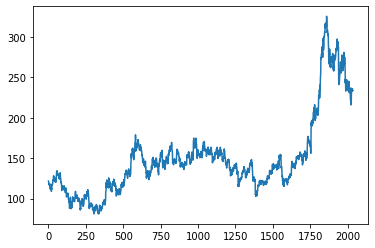

In [9]:
plt.plot(df['Close'])

In [10]:
df1 = df['Close']

# **:: Feature Scaling**

In [11]:
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

# **:: Splitting the data into training and test sets**

In [12]:
training_size = int(len(df1)*0.70)
test_size = len(df1) - training_size


train_data = df1[0:training_size,:]
test_data = df1[training_size:len(df1), :1]

In [13]:
training_size, test_size

(1424, 611)

In [14]:
#convert an array of values into a dataset matrix
def datasetCrtd(dataset, time_step=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step), 0]
    dataX.append(a)
    dataY.append(dataset[i + time_step, 0])

  return np.array(dataX), np.array(dataY)

In [15]:
time_step = 100
X_train, y_train = datasetCrtd(train_data, time_step)
X_test, ytest = datasetCrtd(test_data, time_step)

In [16]:
print(X_train.shape), print(y_train.shape)

(1323, 100)
(1323,)


(None, None)

In [17]:
#Reshape input which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# **:: Building the Model**

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.fit(X_train, y_train, validation_split=0.1, epochs=60, batch_size=64, verbose=1)

Epoch 1/60
19/19 [==============================] - 10s 242ms/step - loss: 0.0090 - val_loss: 0.0019
Epoch 2/60
19/19 [==============================] - 3s 172ms/step - loss: 0.0017 - val_loss: 0.0015
Epoch 3/60
19/19 [==============================] - 3s 175ms/step - loss: 9.4991e-04 - val_loss: 0.0013
Epoch 4/60
19/19 [==============================] - 3s 173ms/step - loss: 8.5001e-04 - val_loss: 0.0011
Epoch 5/60
19/19 [==============================] - 3s 173ms/step - loss: 8.1176e-04 - val_loss: 0.0011
Epoch 6/60
19/19 [==============================] - 3s 175ms/step - loss: 7.9695e-04 - val_loss: 0.0011
Epoch 7/60
19/19 [==============================] - 3s 177ms/step - loss: 7.6858e-04 - val_loss: 0.0010
Epoch 8/60
19/19 [==============================] - 3s 174ms/step - loss: 7.6365e-04 - val_loss: 9.6922e-04
Epoch 9/60
19/19 [==============================] - 3s 173ms/step - loss: 7.2236e-04 - val_loss: 9.9144e-04
Epoch 10/60
19/19 [==============================] - 3s 173ms/s

In [20]:
#Prediction of scaled test set
test_predict = model.predict(X_test)


In [21]:
#transform to original test set
test_predict1 = scaler.inverse_transform(test_predict)

In [22]:
test_predict1

array([[141.86395 ],
       [141.97102 ],
       [140.87488 ],
       [137.84557 ],
       [136.29764 ],
       [136.21992 ],
       [137.96451 ],
       [139.73717 ],
       [139.73036 ],
       [138.8152  ],
       [138.3582  ],
       [139.86096 ],
       [140.87202 ],
       [142.61002 ],
       [144.93506 ],
       [142.18047 ],
       [139.2347  ],
       [139.28418 ],
       [140.61584 ],
       [146.70874 ],
       [151.28201 ],
       [152.52812 ],
       [151.81291 ],
       [149.03629 ],
       [149.26848 ],
       [149.71187 ],
       [150.55884 ],
       [152.51404 ],
       [152.97675 ],
       [152.47308 ],
       [152.65997 ],
       [151.23524 ],
       [147.54546 ],
       [141.35315 ],
       [138.3544  ],
       [138.3156  ],
       [139.05663 ],
       [137.96855 ],
       [134.88376 ],
       [130.52847 ],
       [128.08223 ],
       [127.45635 ],
       [125.61517 ],
       [124.995415],
       [122.84512 ],
       [119.99422 ],
       [119.49586 ],
       [119.5

In [23]:
import math
from sklearn.metrics import mean_squared_error
import sklearn.metrics as metrics
math.sqrt(mean_squared_error(ytest, test_predict)) # MSE Is low

0.05243059248681537

**THANK YOU**